In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Analysis

In [2]:
df_transformer = pd.read_csv(r"../hyper_files/transformer_all.csv")
df_cnn = pd.read_csv(r"../hyper_files/cnn_all.csv")
df_merge = pd.merge(df_transformer, df_cnn, how='outer', on=['model', 'hidden_dim', 'num_layers', 'dropout', 'lr', 'label_weight', 'val_loss', 'AUPR'])

In [3]:
df_transformer


,model,hidden_dim,num_layers,num_heads,dropout,lr,label_weight,val_loss,AUPR
0,transformer,128,2,4,0.2,0.000759,"(0.78324, 8.46187)",0.152767,0.548800
1,transformer,128,3,4,0.1,0.000759,"(0.228, 5.802)",0.088803,0.539652
2,transformer,256,2,4,0.1,0.000759,"(0.78324, 8.46187)",0.200607,0.539574
3,transformer,256,2,4,0.1,0.001000,"(0.78324, 8.46187)",0.179179,0.538748
4,transformer,128,2,2,0.1,0.000759,"(0.78324, 8.46187)",0.172556,0.537895
...,...,...,...,...,...,...,...,...,...
160,transformer,64,3,2,0.3,0.000759,"(0.69317, 24.61498)",0.262572,0.423958
161,transformer,64,3,2,0.3,0.001000,"(0.228, 5.802)",0.064570,0.414433
162,transformer,256,2,4,0.1,0.001000,"(0.78324, 8.46187)",0.067897,0.169855
163,transformer,256,2,2,0.1,0.000759,"(0.78324, 8.46187)",0.060555,0.167677


In [4]:
df_cnn


,model,hidden_dim,num_layers,kernel_size,dropout,lr,label_weight,val_loss,AUPR
0,cnn,128,2,17,0.3,0.0010,"(0.228, 5.802)",0.193641,0.518681
1,cnn,256,2,13,0.3,0.0010,"(0.78324, 8.46187)",0.307929,0.518559
2,cnn,128,2,13,0.3,0.0010,"(0.3865, 8.46187)",0.276328,0.517147
3,cnn,256,2,17,0.1,0.0010,"(0.69317, 24.61498)",0.823631,0.514770
4,cnn,256,2,13,0.2,0.0010,"(0.69317, 24.61498)",0.858292,0.514673
...,...,...,...,...,...,...,...,...,...
111,cnn,128,2,13,0.2,0.0005,"(0.69317, 24.61498)",0.787929,0.478857
112,cnn,128,2,13,0.3,0.0005,"(0.69317, 24.61498)",0.762110,0.477187
113,cnn,128,2,13,0.2,0.0005,"(0.3865, 8.46187)",0.275988,0.475462
114,cnn,256,2,13,0.1,0.0010,"(0.69317, 24.61498)",0.686647,0.472528


### transformer vs. CNN

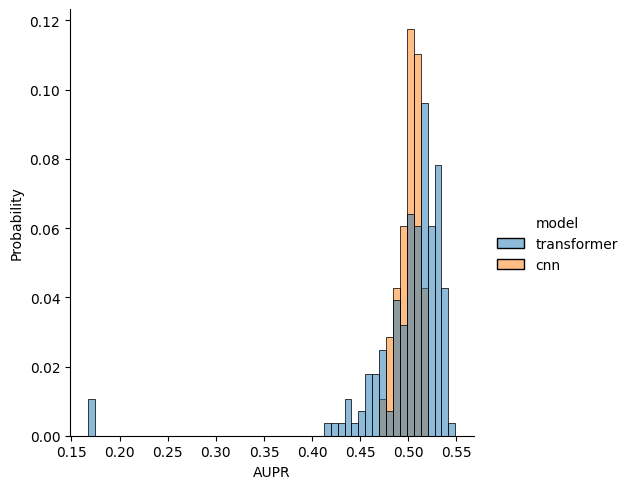

In [5]:
sns.displot(df_merge, x='AUPR', hue='model', stat = 'probability')

### Transformer

In [6]:
df_transformer.keys()
title_names = ['hidden dimension', 'number of encoder layers',
               'number of attention heads', 'dropout rate', 'learning rate', 'label weight']


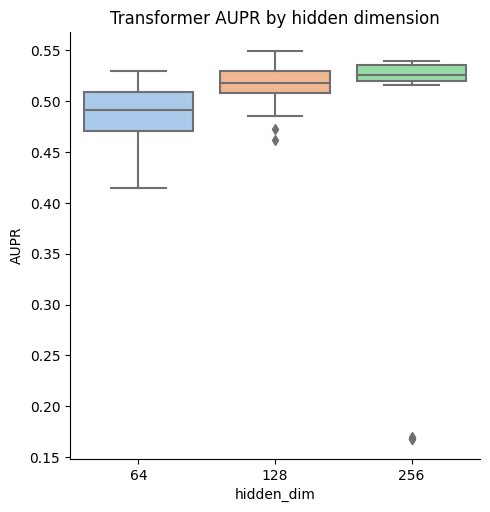

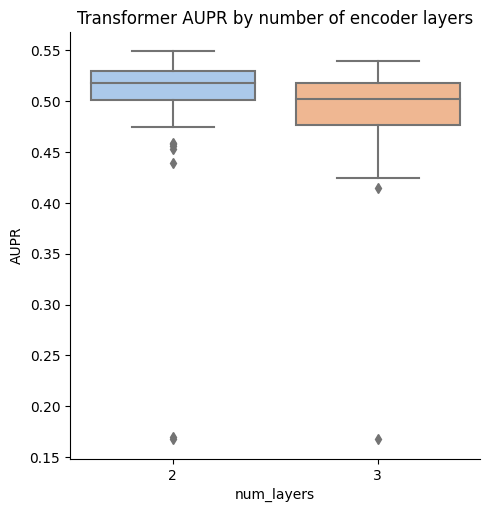

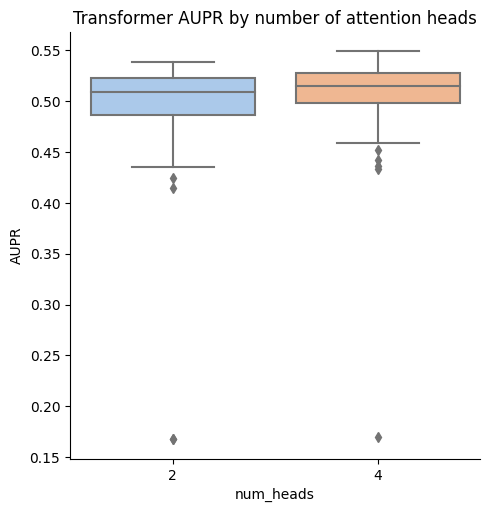

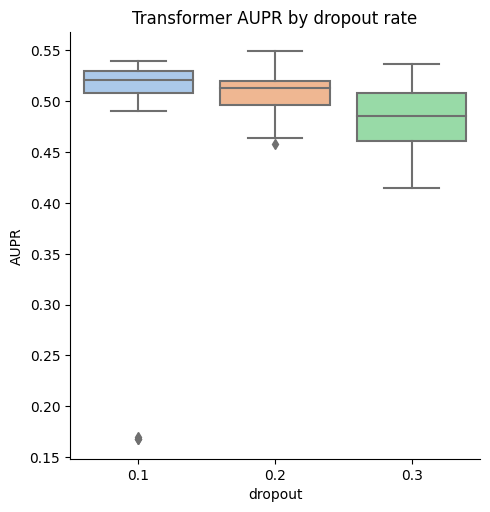

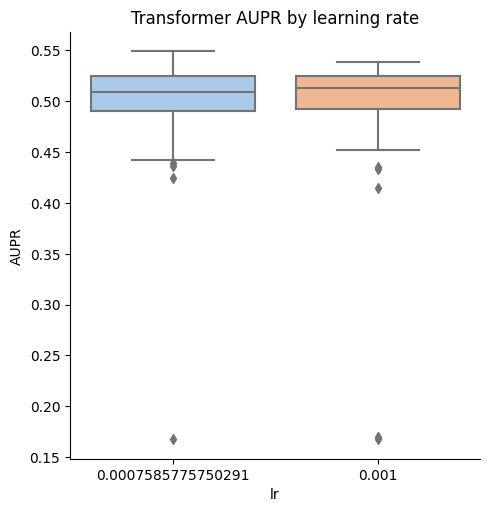

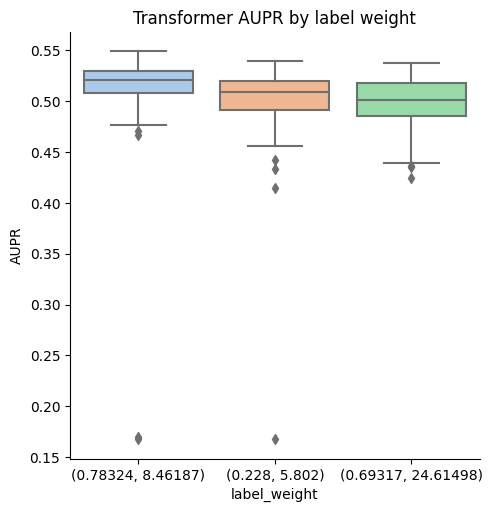

In [7]:
for i, key in enumerate(df_transformer.keys()[1:-2]):
    a = sns.catplot(
        data=df_transformer, x=key, y="AUPR",
        kind="box", palette="pastel",
    ).set(title=f'Transformer AUPR by {title_names[i]}')
    if i == 5:
        a.set_xticklabels(rotation=0)


### CNN

In [8]:

df_cnn = df_cnn.drop(columns=['dropout', 'num_layers'])
title_names = ['hidden channel', 'kernel size', 'learning rate', 'label weight']

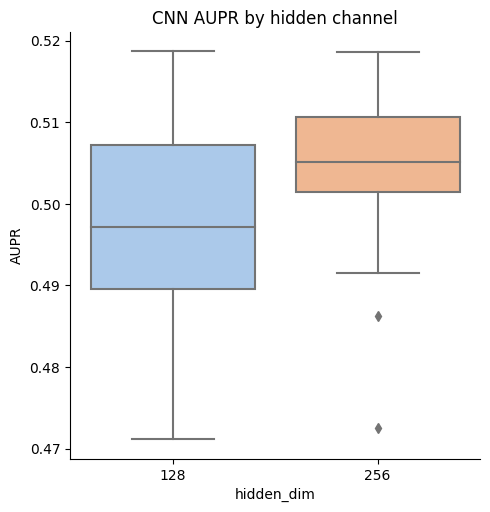

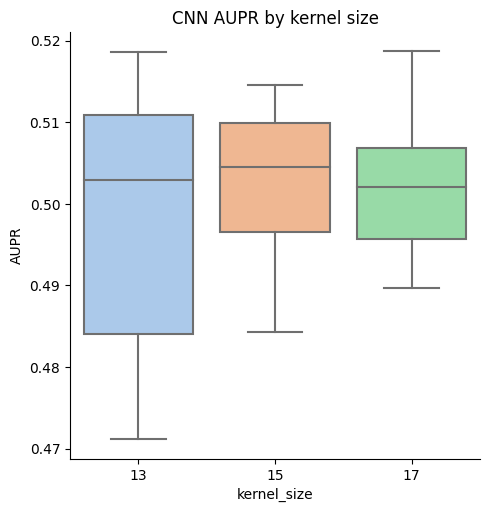

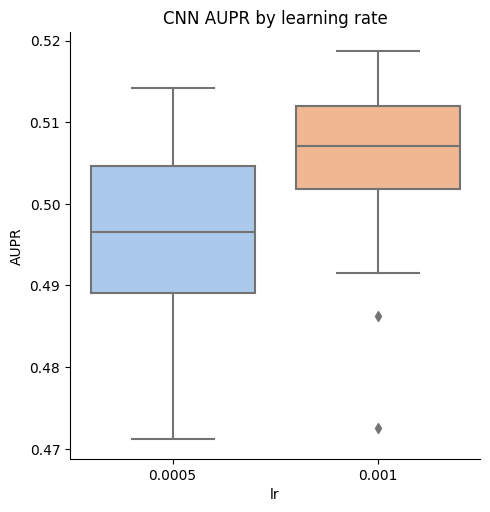

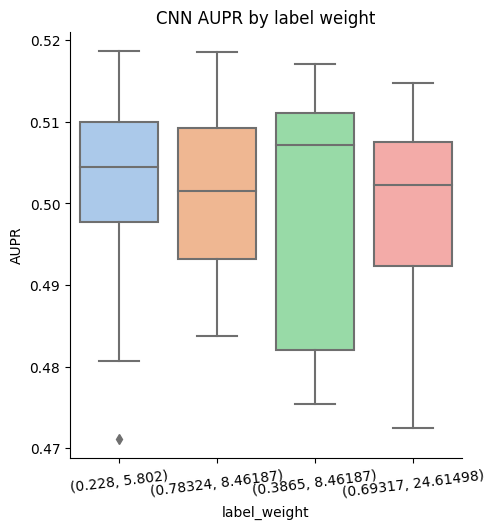

In [10]:
for i, key in enumerate(df_cnn.keys()[1:-2]):
    a = sns.catplot(
        data=df_cnn, x=key, y="AUPR",
        kind="box", palette="pastel",
    ).set(title=f'CNN AUPR by {title_names[i]}')
    if i == 3:
        a.set_xticklabels(rotation=7)
